Let consider that the polymer will behave as a random walk inside the capsule. Then only the entropic term will contribute to the free energy.

In order to properly determine a free energy we need to compute the entropy of configuration. We will account for an excluded volume interaction (self-avoidance) in a "mean-field" way. After pulling inside the capsule $k$ monomer the fraction $k\frac{v}{V}$ won't be aviable anymore.

There for after pulling $k+1$ monomers the number of possibilities will be  $(q-1)(1 - k\frac{v}{V})$ (with q=6 in 3D)

The total number $\mathcal{N}$ of walks will be :

$\begin{aligned} \mathcal{N} &=q(q-1)^{n}\left(1-\frac{v}{V}\right)\left(1-2 \frac{v}{V}\right) \cdots\left[1-(n-1) \frac{v}{V}\right]=\\ &=q(q-1)^{n} \prod_{k=1}^{n-1}\left(1-k \frac{v}{V}\right)=\\ &=q(q-1)^{n} \chi \end{aligned}$

$\begin{aligned} \chi &=\prod_{i=1}^{n-1}\left(1-k \frac{v}{V}\right)=\left(\frac{v}{V}\right)^{n-1} \prod_{k=1}^{n-1}\left(\frac{V}{v}-k\right)=\\ &=\left(\frac{v}{V}\right)^{n} \prod_{k=0}^{n-1}\left(\frac{V}{v}-k\right)=\left(\frac{v}{V}\right)^{n} \frac{\left(\frac{V}{v}\right) !}{\left(\frac{V}{v}-n\right) !} \end{aligned}$

using stirling we find $\ln \chi = -n+\left(\frac{V}{v}-n\right)\left[\ln \frac{V}{v}-\ln \left(\frac{V}{v}-n\right)\right]$



The expression for the free energy is then :

$F = - K_B T \left ( \ln q + n\ln (q-1) -n+\left(\frac{V}{v}-n\right)\left[\ln \frac{V}{v}-\ln \left(\frac{V}{v}-n\right)\right] \right) $


Now we can compute the pressure, by considering the variation with respect to the volume occupied by the polymer ($nv$)

$$-p = \frac{\partial F}{\partial (nv)} = K_B T \left [ \frac{1}{v} \ln(q-1) -\frac{1}{v} - \left( \frac{V}{nv^2} + \frac{1}{v}\right) \left[\ln \frac{V}{v}-\ln \left(\frac{V}{v}-n\right)\right] + \left(\frac{V}{v}-n\right)  \left[ 
- \frac{1}{nv} + \frac{1}{\frac{V}{v}-n} \left( \frac{V}{nv^2} +\frac{1}{v}  \right)\right]  \right] $$

$$\Rightarrow f =   -\frac{K_B T}{4\pi d^2}\left [ \frac{1}{v} \ln(q-1) -\frac{1}{v} - \left( \frac{V}{nv^2} + \frac{1}{v}\right) \left[\ln \frac{V}{v}-\ln \left(\frac{V}{v}-n\right)\right] + \left(\frac{V}{v}-n\right)  \left[ 
- \frac{1}{nv} + \frac{1}{\frac{V}{v}-n} \left( \frac{V}{nv^2} +\frac{1}{v}  \right)\right]  \right] $$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
x = np.array([30.37292789969,31.99187600139,33.6108241031,
              35.22977220481,36.84872030651,38.46766840822,
              40.65324834552,42.27219644723,43.89114454894,
              45.51009265064,47.12904075235,48.74798885406,50.36693695576,
              51.98588505747,53.60483315918,55.22378126088,
              56.84272936259,58.4616774643,60.080625566,
              61.69957366771,63.31852176942,64.93746987113,
              66.55641797283,68.17536607454,69.79431417625,
              71.41326227795,73.03221037966,74.65115848137,
              76.27010658307,77.88905468478,79.50800278649,
              81.12695088819,82.7458989899,84.36484709161,
              85.98379519331,87.60274329502,89.22169139673,
              90.84063949843,92.45958760014,94.07853570185,
              95.69748380355,97.31643190526,98.93538000697,
              100.5543281087,102.1732762104,103.7922243121])


y = np.array([-0.5429885000496,-0.6086670962625,-0.1817562208784,
              0.01527956776048,0.01527956776048,-0.08323832655894,
              -0.08323832655894,0.1137974620799,0.4093511450382,
              1.033297809061,1.263172895806,1.460208684445,
              1.624405174978,1.952798156042,2.576744820065,
              3.200691484088,3.726120253792,4.842656389412,
              6.057710419352,7.502639536036,8.750532864082,
              9.867068999703,11.27915881828,13.15099881035,
              16.00801774561,18.17541142064,19.94873351839,
              21.49218052939,22.70723455933,24.11932437791,
              25.89264647566,28.15855804501,30.6543447011,
              33.47852433826,36.99232923565,39.84934817091,
              42.11525974026,43.92142113612,45.46486814712,
              46.81127936949,47.92781550511,48.88015515019,
              49.79965549717,50.52212005552,51.34310250818,
              51.9670491722])

In [3]:
R = 20            # capsule radius (nm)
N = 19000         # number of baise-pairs
pi = np.pi
V = 1.3*pi*(R**3) # volume of the capsule
S = 4*pi*(R**2)   # surface of the capsule
K = 0.164        # K_B (pN nm)


def model(x,q,v,T) :
    n = (N*x/100)/150 # we have divide by persistance length
    
    f = -T*(K/S) * ((1/v)*np.log(q-1) -1/v - (V/(n* v**2) + 1/v)*(np.log(V/v) - np.log(V/v  -n)) +(V/v -n)*(-1/(n*v)+ 1/(V/v -n) *(V/(n* v**2) +1/v)))
    
    return f

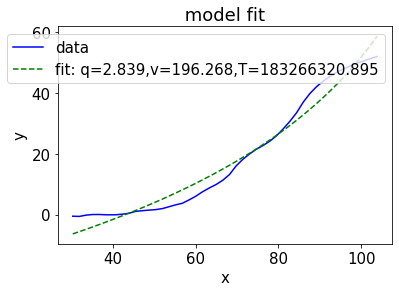

In [4]:
plt.figure(1)
plt.rc('font', size=15)

popt, pcov = curve_fit(model, x,y,maxfev=10000,p0=[3,10,3000000000],bounds=([1,1,0],[6,260,np.inf]))

plt.plot(x, y, 'b-', label='data')
plt.plot(x, model(x, *popt), 'g--',
         label='fit: q=%5.3f,v=%5.3f,T=%5.3f' % tuple(popt))

plt.xlabel('x')
plt.ylabel('y')
plt.title(' model fit ')
plt.legend()
plt.show()

It appear that the temperature necessary for entropy to be dominant in this system is way higher than melting temperature of DNA.